<a href="https://colab.research.google.com/github/NINGTANG1124/coffee_quality_project/blob/main/Coffee_rating_project_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Rread file
data = pd.read_csv('/content/drive/MyDrive/coffee_quality_project/coffee_ratings.csv')


In [3]:
# Check for missing values
print("Missing value statistics：")
print(data.isnull().sum())

# Delete columns with excessive missing values（>50%)
missing_percentage = data.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data = data.drop(columns=columns_to_drop)
print(f'Deleted the following (more than 50% missing values): {list(columns_to_drop)}')

# Fill missing values
data['total_cup_points'].fillna(data['total_cup_points'].median(), inplace=True)
data['country_of_origin'].fillna(data['country_of_origin'].mode()[0], inplace=True)
data['species'].fillna(data['species'].mode()[0], inplace=True)

# Deleting Exceptions
# Remove outliers with scores below 50 or above 100
data = data[(data['total_cup_points'] >= 50) & (data['total_cup_points'] <= 100)]
# Remove unusual samples with negative elevation values
data = data[data['altitude_mean_meters'] > 0]

# Delete irrelevant columns
columns_to_remove = ['lot_number', 'ico_number', 'certification_body', 'expiration']
data = data.drop(columns=columns_to_remove, errors='ignore')

Missing value statistics：
total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                159
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers       

<ipython-input-3-e14666b6c786>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_cup_points'].fillna(data['total_cup_points'].median(), inplace=True)
<ipython-input-3-e14666b6c786>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [4]:
# Check cleaned data
print("cleaned data：")
print(data.head())
print(data.info())
print(data.describe())

cleaned data：
   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name       mill  \
0                                 metad plc  metad plc   
1                                 metad plc  metad plc   
2  san marcos barrancas "san cristobal cuch        NaN   
3     yidnekachew dabessa coffee plantation    wolensu   
4                                 metad plc  metad plc   

                                 company       altitude        region  \
0      metad agricultural developmet plc      1950-2200  guji-hambela   
1      metad agricultural developm

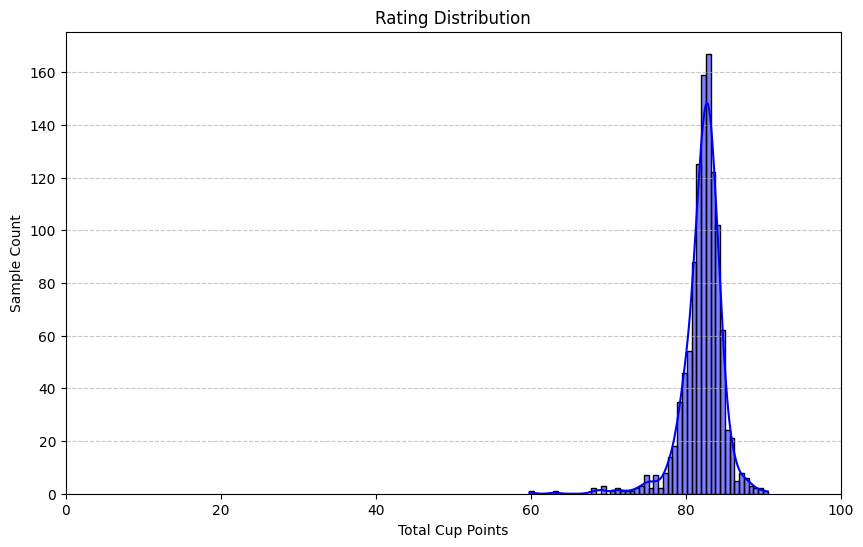

In [5]:
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['total_cup_points'], bins=50, kde=True, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Total Cup Points")
plt.ylabel("Sample Count")
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
data['species'] = data['species'].str.strip().str.capitalize()
# Check coffee species
unique_species = data['species'].unique()
species_count = data['species'].nunique()

print("Coffee species include：", unique_species)
print("Total number of coffee species is：", species_count)

Coffee species include： ['Arabica' 'Robusta']
Total number of coffee species is： 2


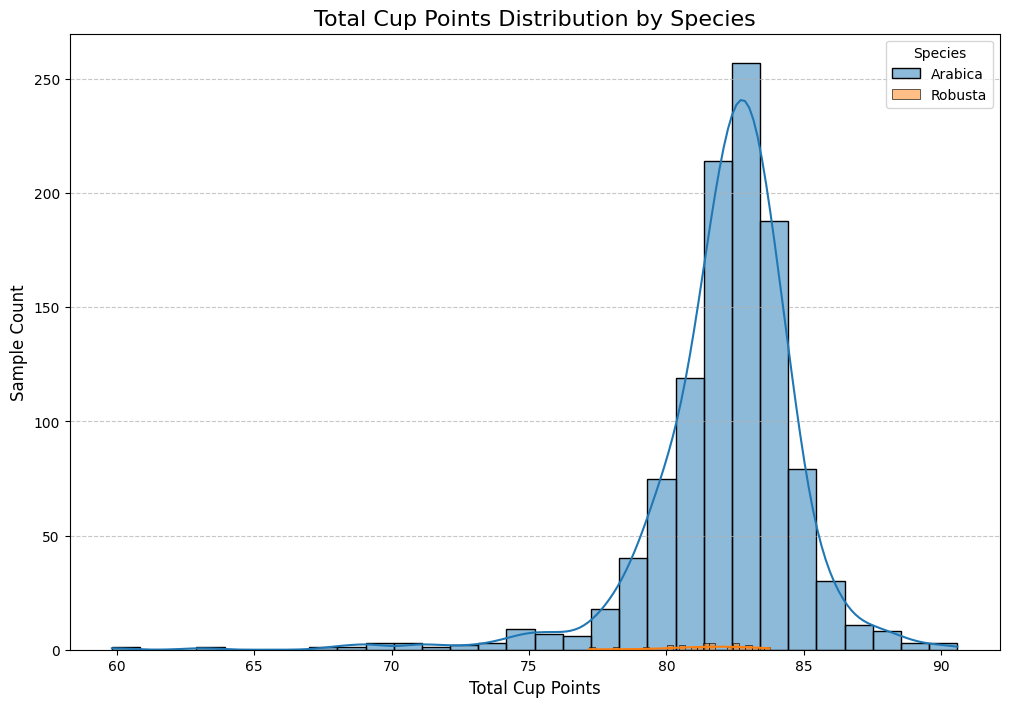

In [7]:
# Distribution of ratings by species
species_list = data['species'].unique()

plt.figure(figsize=(12, 8))
for species in species_list:
    subset = data[data['species'] == species]
    sns.histplot(subset['total_cup_points'], kde=True, label=species, bins=30, alpha=0.5)

plt.title('Total Cup Points Distribution by Species', fontsize=16)
plt.xlabel('Total Cup Points', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.legend(title='Species')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

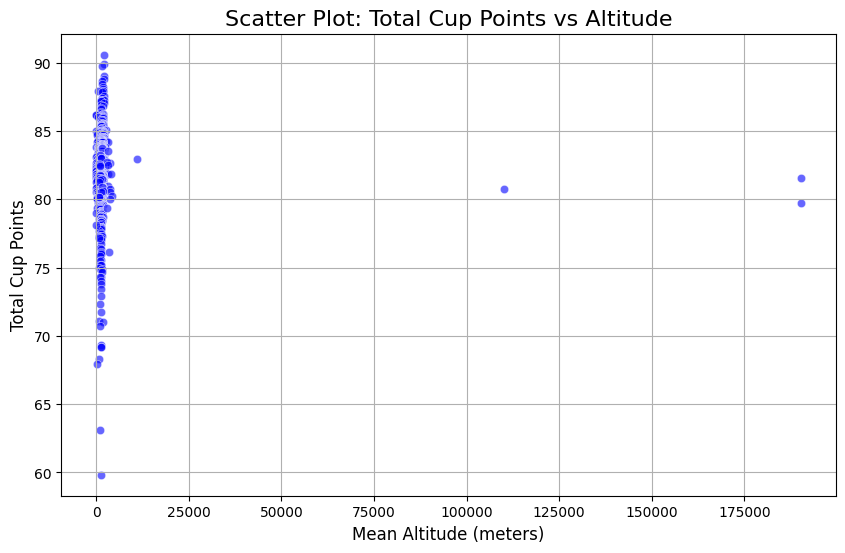

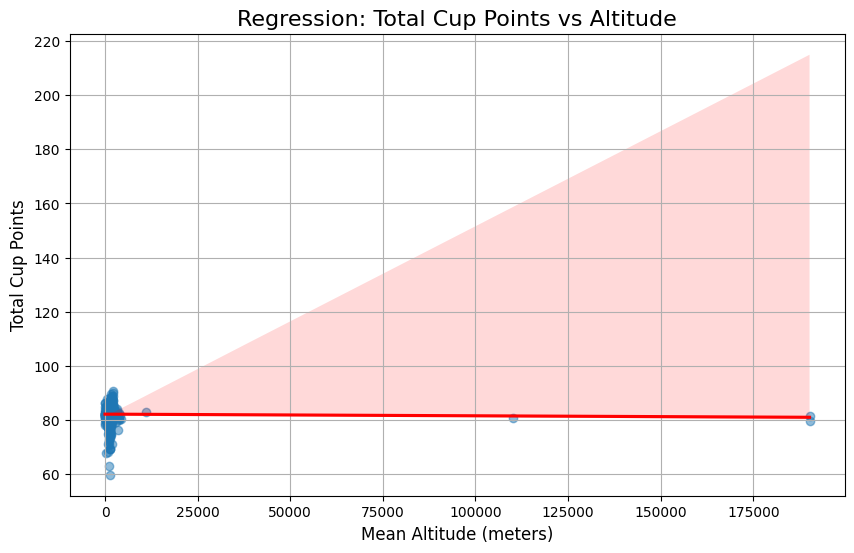

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatterplot of ratings and altitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='altitude_mean_meters', y='total_cup_points', data=data, alpha=0.6, color='blue')
plt.title('Scatter Plot: Total Cup Points vs Altitude', fontsize=16)
plt.xlabel('Mean Altitude (meters)', fontsize=12)
plt.ylabel('Total Cup Points', fontsize=12)
plt.grid()
plt.show()

# 2. Regression analysis
plt.figure(figsize=(10, 6))
sns.regplot(x='altitude_mean_meters', y='total_cup_points', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression: Total Cup Points vs Altitude', fontsize=16)
plt.xlabel('Mean Altitude (meters)', fontsize=12)
plt.ylabel('Total Cup Points', fontsize=12)
plt.grid()
plt.show()

In [9]:
# Check unique values for country names
print("Unique countries in the data:")
print(data['country_of_origin'].unique())

# Standardised country names
data['country_of_origin'] = data['country_of_origin'].str.strip().str.title()

Unique countries in the data:
['Ethiopia' 'Guatemala' 'United States' 'United States (Hawaii)'
 'Indonesia' 'China' 'Costa Rica' 'Mexico' 'Brazil' 'Uganda' 'Honduras'
 'Taiwan' 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea'
 'El Salvador' 'Tanzania, United Republic Of' 'Nicaragua' 'Japan'
 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi' 'Vietnam'
 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar' 'Mauritius'
 'Cote d?Ivoire' 'Peru' 'India']


In [10]:
import plotly.express as px

# Average of ratings by country
country_ratings = data.groupby('country_of_origin', as_index=False)['total_cup_points'].mean()
country_ratings.columns = ['country', 'avg_rating']

print(country_ratings.head())

# Interactive map
fig = px.choropleth(
    country_ratings,
    locations="country",
    locationmode="country names",
    color="avg_rating",
    title="Average Coffee Rating by Country",
    color_continuous_scale="YlGnBu",
    labels={'avg_rating': 'Average Rating'}
)

fig.show()

      country  avg_rating
0      Brazil   82.713429
1     Burundi   81.830000
2       China   82.927500
3    Colombia   83.226667
4  Costa Rica   82.800435


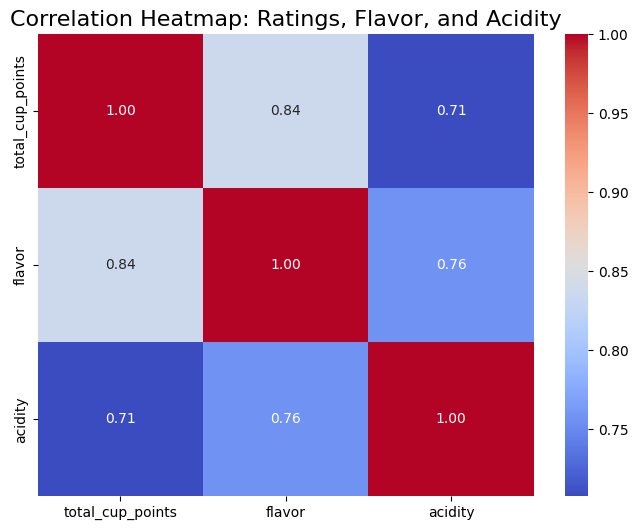

In [11]:
# Calculate correlation matrix
correlation_matrix = data[['total_cup_points', 'flavor', 'acidity']].corr()

# Heat mapping of flavour and acidity
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Ratings, Flavor, and Acidity', fontsize=16)
plt.show()